In [1]:
#!pip install geonamescache
import tweepy
import numpy
import pandas as pd
import requests
from bs4 import BeautifulSoup
import importlib
import json
from helper import *
from selenium import webdriver
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn import linear_model


In [2]:
pd.options.display.max_columns = 200

In [139]:
df=pd.read_csv("out.csv")
df=pd.concat([df,pd.read_csv("out2.csv"),pd.read_csv("out3.csv"),pd.read_csv("out4.csv"),pd.read_csv("out5.csv"),pd.read_csv("out6.csv")])
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'out4.csv'

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20547 entries, 0 to 1414
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      20547 non-null  int64  
 1   name            20547 non-null  object 
 2   age             330 non-null    float64
 3   city            20547 non-null  object 
 4   country         20547 non-null  object 
 5   gender          0 non-null      float64
 6   acount age      20547 non-null  float64
 7   total tweets    20547 non-null  int64  
 8   followers       20547 non-null  int64  
 9   following       20547 non-null  int64  
 10  respectability  20547 non-null  float64
 11  verified        20547 non-null  bool   
 12  text            20547 non-null  object 
 13  views           20547 non-null  int64  
 14  likes           20547 non-null  int64  
 15  retweets        20547 non-null  int64  
 16  quote retweets  20547 non-null  int64  
 17  comments        20547 non-null  

In [5]:
df=df.drop(["age", "gender",'hashtags','Unnamed: 0'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20547 entries, 0 to 1414
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            20547 non-null  object 
 1   city            20547 non-null  object 
 2   country         20547 non-null  object 
 3   acount age      20547 non-null  float64
 4   total tweets    20547 non-null  int64  
 5   followers       20547 non-null  int64  
 6   following       20547 non-null  int64  
 7   respectability  20547 non-null  float64
 8   verified        20547 non-null  bool   
 9   text            20547 non-null  object 
 10  views           20547 non-null  int64  
 11  likes           20547 non-null  int64  
 12  retweets        20547 non-null  int64  
 13  quote retweets  20547 non-null  int64  
 14  comments        20547 non-null  int64  
 15  word count      20547 non-null  int64  
 16  is quote        20547 non-null  bool   
 17  hashtag count   20547 non-null  

In [7]:
df.describe(include='all')

,name,city,country,acount age,total tweets,followers,following,respectability,verified,text,views,likes,retweets,quote retweets,comments,word count,is quote,hashtag count,trending,using trends?,link to tweet
count,20547,20547,20547,20547.000000,2.054700e+04,2.054700e+04,20547.000000,20547.000000,20547,20547,20547.000000,20547.000000,20547.000000,20547.000000,20547.000000,20547.000000,20547,20547.000000,20547,20547,20547
unique,12095,3381,5,NaN,NaN,NaN,NaN,NaN,2,18127,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,246,2,18163
top,Dawesfgmailcom6,Auckland,United States,NaN,NaN,NaN,NaN,NaN,False,@whosjordi's account is temporarily unavailabl...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,"['Donny', 'Trossard', 'Jennie', 'Phineas', 'Fe...",False,https://www.twitter.com/LaurieFleming/status/1...
freq,202,1573,5147,NaN,NaN,NaN,NaN,NaN,19981,5,NaN,NaN,NaN,NaN,NaN,NaN,15308,NaN,1536,19699,2
mean,NaN,NaN,NaN,10.246070,6.900196e+04,5.651450e+03,1676.641554,2.081166,NaN,NaN,1066.121186,13.599893,2.033192,0.151214,1.015720,15.951039,NaN,0.582129,NaN,NaN,NaN
std,NaN,NaN,NaN,4.727793,7.127004e+05,1.082666e+05,8047.448325,6.259152,NaN,NaN,11522.349999,196.329459,44.212679,2.709742,9.022906,12.494057,NaN,1.652147,NaN,NaN,NaN
min,NaN,NaN,NaN,0.100000,1.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,5.800000,2.785000e+03,2.320000e+02,256.000000,0.529945,NaN,NaN,33.000000,0.000000,0.000000,0.000000,0.000000,7.000000,NaN,0.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,11.500000,1.187400e+04,6.750000e+02,645.000000,1.087361,NaN,NaN,107.000000,1.000000,0.000000,0.000000,0.000000,12.000000,NaN,0.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,14.300000,3.792600e+04,1.848000e+03,1575.000000,2.143751,NaN,NaN,359.000000,4.000000,0.000000,0.000000,0.000000,22.000000,NaN,0.000000,NaN,NaN,NaN


In [8]:
df['likes'].value_counts()

0       9358
1       3308
2       1681
3        979
4        707
        ... 
168        1
179        1
302        1
880        1
3042       1
Name: likes, Length: 310, dtype: int64

In [9]:
df['retweets'].value_counts()

0      16495
1       2010
2        637
3        350
4        200
       ...  
857        1
175        1
59         1
84         1
798        1
Name: retweets, Length: 119, dtype: int64

In [10]:
df['country'].value_counts()
#df['location'].vlue_counts().plot(kind='pie')


United States     5147
New Zealand       3921
United Kingdom    3841
Australia         3821
Canada            3817
Name: country, dtype: int64

<AxesSubplot:ylabel='country'>

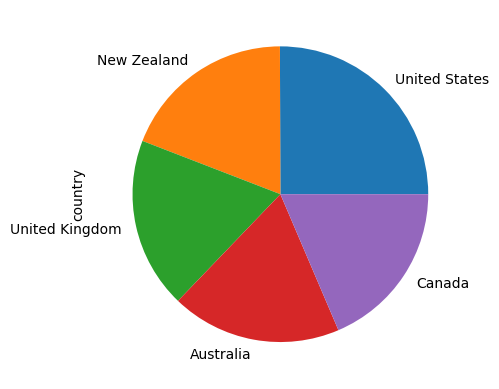

In [11]:
df['country'].value_counts().plot(kind='pie')

In [12]:

df['country'].value_counts(normalize=True)

United States     0.250499
New Zealand       0.190831
United Kingdom    0.186937
Australia         0.185964
Canada            0.185769
Name: country, dtype: float64

In [13]:
df.insert(df.columns.get_loc("respectability")+1,'is respactable?' ,[1 if x >= .75 else 0 for x in df['respectability']])

In [14]:
df['acount age'].value_counts()


14.2    487
3.2     484
15.2    433
13.2    371
12.2    363
       ... 
19.2      1
0.7       1
17.7      1
0.1       1
18.1      1
Name: acount age, Length: 184, dtype: int64

In [15]:
df['total tweets'].value_counts()

105       181
67929     126
67841      76
98047      72
37226      61
         ... 
196553      1
13683       1
17916       1
20215       1
4141        1
Name: total tweets, Length: 10447, dtype: int64

In [16]:
df.head()

,name,city,country,acount age,total tweets,followers,following,respectability,is respactable?,verified,text,views,likes,retweets,quote retweets,comments,word count,is quote,hashtag count,trending,using trends?,link to tweet
0,CamuyArenas_AA,Puente,United States,3.2,228,50,22,0.440000,0,False,Just posted a photo @ Estadio Juan F.Cheo Lópe...,13,0,0,0,0,11,False,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/CamuyArenas_AA/status/...
1,16p11dot2ds,Georgia,United States,4.9,32312,33,481,14.575758,1,False,This is a prep free zone. https://t.co/2qqlLxy...,336,1,0,0,1,8,True,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/16p11dot2ds/status/161...
2,PoopScoopSF,Downtown,United States,4.7,163626,415,125,0.301205,0,False,"""Big poop front of our door."" (Downtown, D3) h...",9,0,0,0,1,10,False,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/PoopScoopSF/status/161...
3,wchazz,Wesley Chapel,United States,15.4,48876,377,951,2.522546,1,False,"2nd cardio, target calories 1k @ Wesley Chapel...",4,0,0,0,0,10,False,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/wchazz/status/16139885...
4,wyatthebson,Pier 17,United States,16.8,24061,1366,4999,3.659590,1,False,Listen to PODCAST #6 SGUZR by Core Beats on Tn...,13,0,0,0,0,11,False,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/wyatthebson/status/161...


In [17]:
df[df.duplicated()]

,name,city,country,acount age,total tweets,followers,following,respectability,is respactable?,verified,text,views,likes,retweets,quote retweets,comments,word count,is quote,hashtag count,trending,using trends?,link to tweet


In [18]:
df[df['text'].duplicated()]

,name,city,country,acount age,total tweets,followers,following,respectability,is respactable?,verified,text,views,likes,retweets,quote retweets,comments,word count,is quote,hashtag count,trending,using trends?,link to tweet
497,CTDOT_District1,Meriden,United States,14.8,269088,967,0,0.000000,0,False,Delays - MERIDEN #I91 North 0.72 miles before ...,13,0,0,0,0,19,False,2,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/CTDOT_District1/status...
928,511nyLongIsland,Freeport,United States,16.1,389799,2398,0,0.000000,0,False,Cleared: Construction on #NY27 EB from Guy Lom...,28,0,0,0,0,13,False,1,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/511nyLongIsland/status...
1270,511NYC,New York,United States,16.5,1696853,2404,3,0.001248,0,False,Cleared: Construction on #ThrogsNeckBridge SB ...,10,0,0,0,0,11,False,1,"['#OpenDnD', 'Friday the 13th', 'Staley', 'Lor...",False,https://www.twitter.com/511NYC/status/16139865...
1272,511NY,Manhattan,United States,16.1,6020386,4234,15,0.003543,0,False,Cleared: Incident on #RFKTriboroughBridge SB a...,6,0,0,0,0,8,False,1,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/511NY/status/161398650...
1274,511NYC,Queens,United States,16.5,1696853,2404,3,0.001248,0,False,Cleared: Construction on #ThrogsNeckBridge NB ...,8,0,0,0,0,11,False,1,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/511NYC/status/16139864...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,jamesmichael_13,Plano,United States,13.5,33925,957,892,0.932079,1,False,MANCHESTER IS RED,89,0,0,0,0,3,False,0,"['Rashford', '#ManchesterDerby', '#MUNMCI', 'G...",False,https://www.twitter.com/jamesmichael_13/status...
586,jaiye_baba,Bear,United States,14.3,107999,3361,3809,1.133294,1,False,MANCHESTER IS RED,158,1,1,0,0,3,False,0,"['Rashford', '#ManchesterDerby', '#MUNMCI', 'G...",False,https://www.twitter.com/jaiye_baba/status/1614...
1034,511NYC,Manhattan,United States,16.5,1697245,2405,3,0.001247,0,False,Cleared: Incident on #NY9A NB at George Washin...,11,0,0,0,0,11,False,1,"['Rashford', '#ManchesterDerby', '#MUNMCI', 'G...",False,https://www.twitter.com/511NYC/status/16142664...
1308,511NYMidHudson,New York,United States,16.1,995657,1408,0,0.000000,0,False,Cleared: Incident on #I87NYSThruway NB at Afte...,34,0,0,0,0,16,False,1,"['Rashford', '#ManchesterDerby', '#MUNMCI', 'G...",False,https://www.twitter.com/511NYMidHudson/status/...


In [19]:
df=df.drop_duplicates(subset='text',keep=False)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15714 entries, 0 to 1414
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             15714 non-null  object 
 1   city             15714 non-null  object 
 2   country          15714 non-null  object 
 3   acount age       15714 non-null  float64
 4   total tweets     15714 non-null  int64  
 5   followers        15714 non-null  int64  
 6   following        15714 non-null  int64  
 7   respectability   15714 non-null  float64
 8   is respactable?  15714 non-null  int64  
 9   verified         15714 non-null  bool   
 10  text             15714 non-null  object 
 11  views            15714 non-null  int64  
 12  likes            15714 non-null  int64  
 13  retweets         15714 non-null  int64  
 14  quote retweets   15714 non-null  int64  
 15  comments         15714 non-null  int64  
 16  word count       15714 non-null  int64  
 17  is quote     

In [21]:
df['country'].value_counts(normalize=True)

United States     0.324806
United Kingdom    0.244432
Canada            0.242650
Australia         0.152730
New Zealand       0.035382
Name: country, dtype: float64

<AxesSubplot:ylabel='country'>

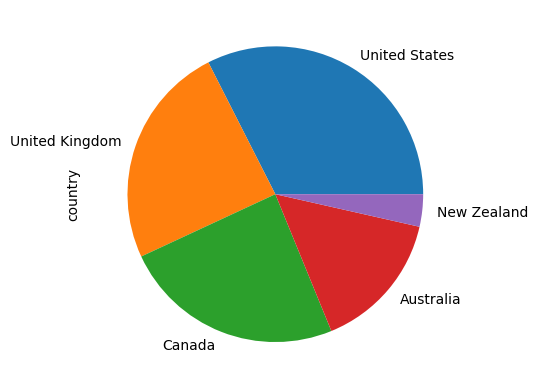

In [22]:
df['country'].value_counts().plot(kind='pie')

In [23]:
df['verified'].value_counts(normalize=True)

False    0.969454
True     0.030546
Name: verified, dtype: float64

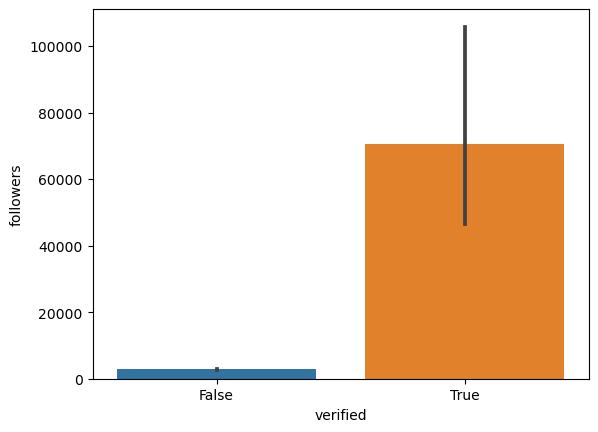

In [24]:
sns.barplot(x='verified', y='followers', data=df)
plt.show()

In [25]:
df['word count'].value_counts()

9     877
8     819
7     718
2     712
10    690
     ... 
60      1
63      1
85      1
64      1
69      1
Name: word count, Length: 67, dtype: int64

In [26]:
df['is quote'].value_counts()

False    11419
True      4295
Name: is quote, dtype: int64

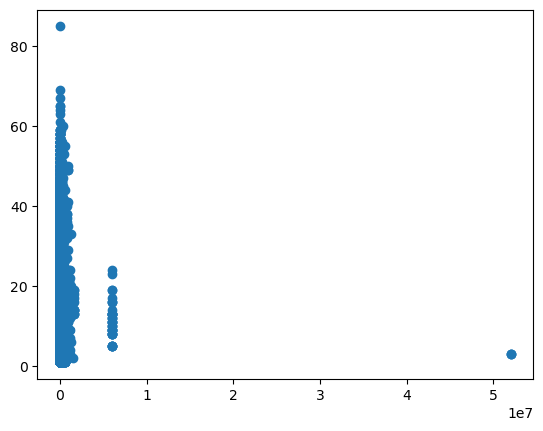

In [27]:
plt.scatter(df['total tweets'],df['word count'])

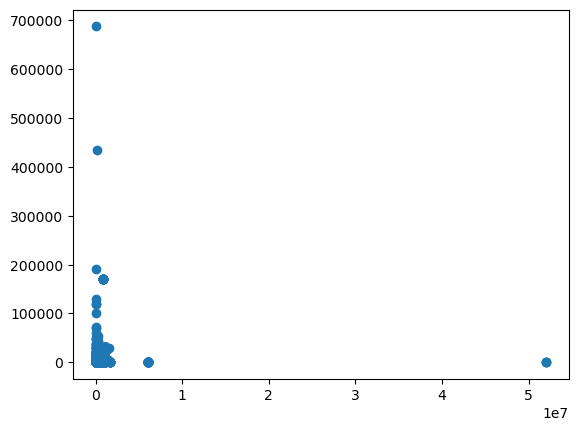

In [28]:
plt.scatter(df['total tweets'],df['following'])

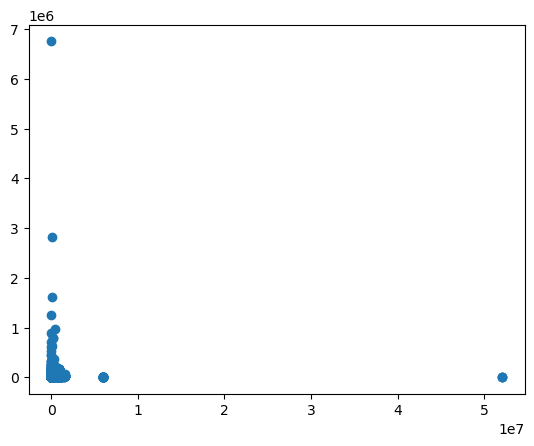

In [29]:
plt.scatter(df['total tweets'],df['followers'])

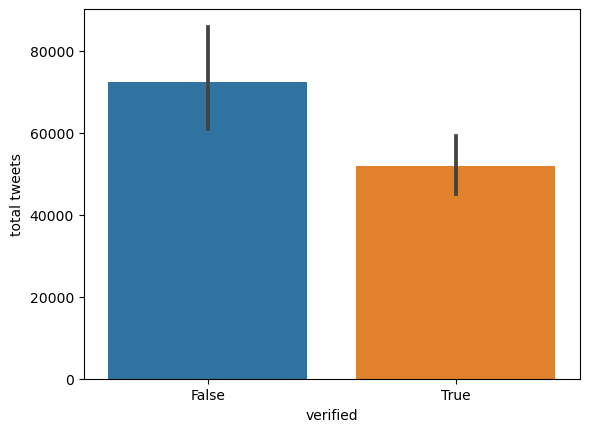

In [30]:
sns.barplot(x='verified', y='total tweets', data=df)
plt.show()

In [31]:
df['is respactable?'].value_counts(normalize=True)

1    0.662467
0    0.337533
Name: is respactable?, dtype: float64

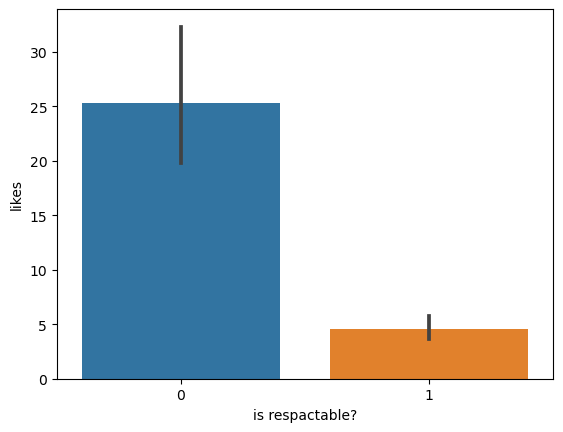

In [32]:
sns.barplot(x='is respactable?', y='likes', data=df)
plt.show()

In [33]:
df['retweets'].value_counts()

0      12509
1       1584
2        518
3        275
4        150
       ...  
190        1
111        1
175        1
59         1
798        1
Name: retweets, Length: 104, dtype: int64

In [34]:
pd.cut(df['retweets'],bins=5).value_counts()

(-4.826, 965.2]     15711
(965.2, 1930.4]         1
(1930.4, 2895.6]        1
(3860.8, 4826.0]        1
(2895.6, 3860.8]        0
Name: retweets, dtype: int64

(array([1.5711e+04, 1.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  965.2, 1930.4, 2895.6, 3860.8, 4826. ]),
 <BarContainer object of 5 artists>)

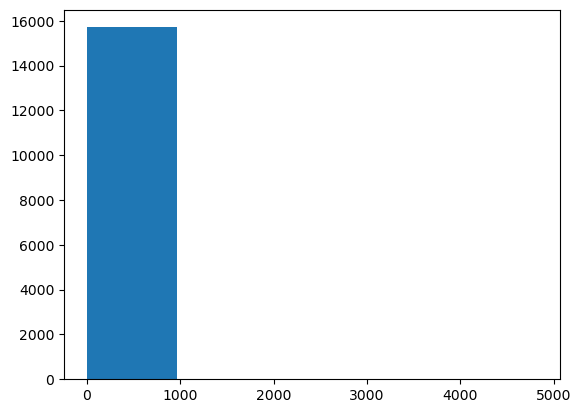

In [35]:
plt.hist(df['retweets'],bins=5)

In [36]:
df.head()

,name,city,country,acount age,total tweets,followers,following,respectability,is respactable?,verified,text,views,likes,retweets,quote retweets,comments,word count,is quote,hashtag count,trending,using trends?,link to tweet
0,CamuyArenas_AA,Puente,United States,3.2,228,50,22,0.440000,0,False,Just posted a photo @ Estadio Juan F.Cheo Lópe...,13,0,0,0,0,11,False,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/CamuyArenas_AA/status/...
1,16p11dot2ds,Georgia,United States,4.9,32312,33,481,14.575758,1,False,This is a prep free zone. https://t.co/2qqlLxy...,336,1,0,0,1,8,True,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/16p11dot2ds/status/161...
2,PoopScoopSF,Downtown,United States,4.7,163626,415,125,0.301205,0,False,"""Big poop front of our door."" (Downtown, D3) h...",9,0,0,0,1,10,False,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/PoopScoopSF/status/161...
3,wchazz,Wesley Chapel,United States,15.4,48876,377,951,2.522546,1,False,"2nd cardio, target calories 1k @ Wesley Chapel...",4,0,0,0,0,10,False,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/wchazz/status/16139885...
4,wyatthebson,Pier 17,United States,16.8,24061,1366,4999,3.659590,1,False,Listen to PODCAST #6 SGUZR by Core Beats on Tn...,13,0,0,0,0,11,False,0,"['Friday the 13th', 'Staley', 'Lori Harvey', '...",False,https://www.twitter.com/wyatthebson/status/161...


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 30343 (\N{CJK UNIFIED IDEOGRAPH-7687}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23478 (\N{CJK UNIFIED IDEOGRAPH-5BB6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 24481 (\N{CJK UNIFIED IDEOGRAPH-5FA1}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23476 (\N{CJK UNIFIED IDEOGRAPH-5BB4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 19968 (\N{CJK UNIFIED IDEOGRAPH-4E00}) missing from current font.
  fig.canvas.print_figure(bytes_

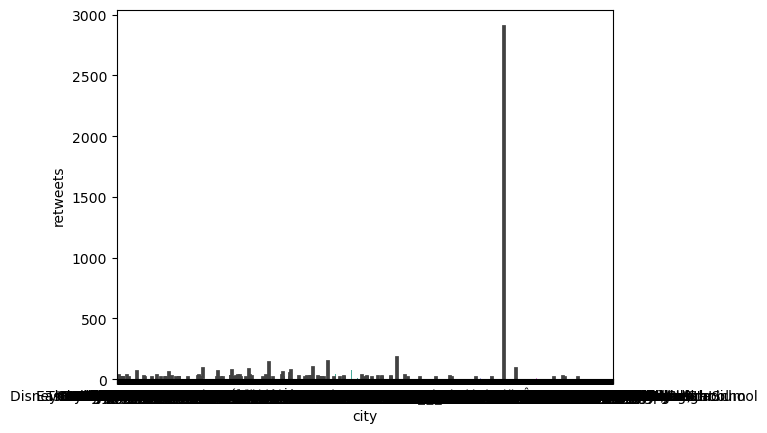

In [37]:
sns.barplot(x='city', y='retweets', data=df)
plt.show()

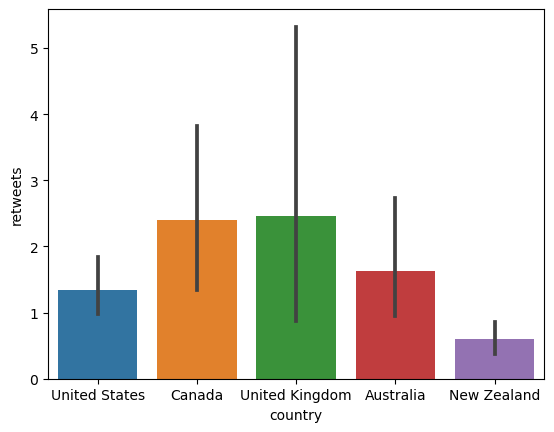

In [38]:
sns.barplot(x='country', y='retweets', data=df)
plt.show()


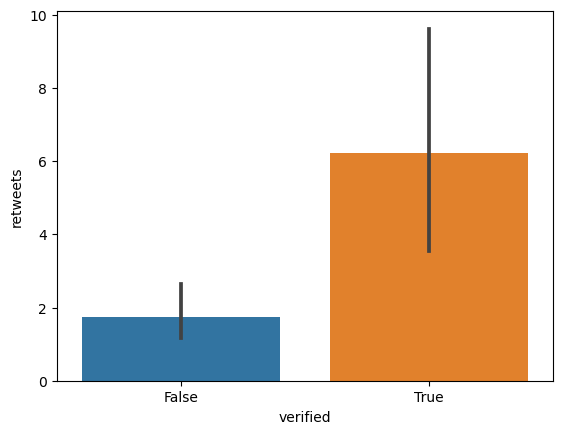

In [39]:
sns.barplot(x='verified', y='retweets', data=df)
plt.show()

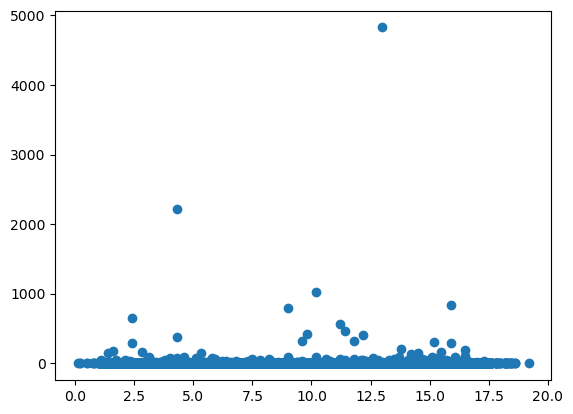

In [40]:
plt.scatter(df['acount age'],df['retweets'])

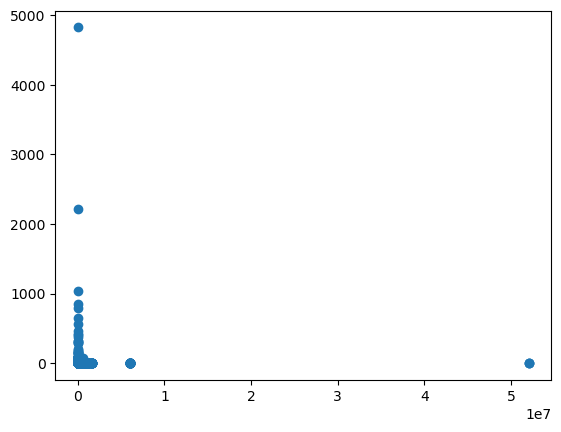

In [41]:
plt.scatter(df['total tweets'],df['retweets'])

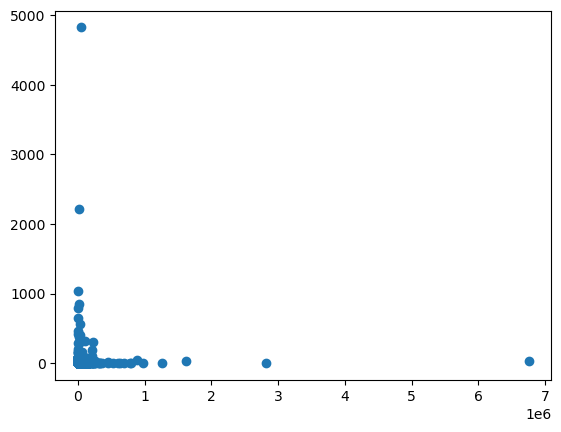

In [42]:
plt.scatter(df['followers'],df['retweets'])

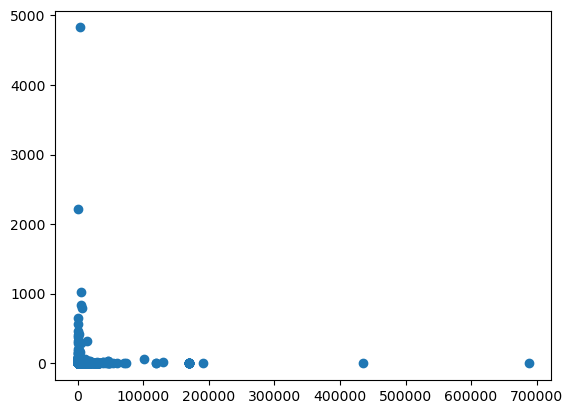

In [43]:
plt.scatter(df['following'],df['retweets'])

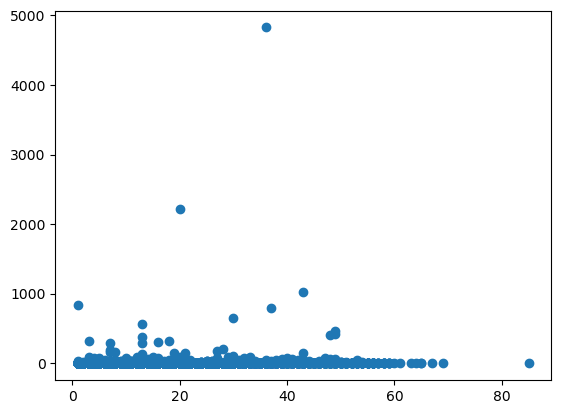

In [44]:
plt.scatter(df['word count'],df['retweets'])

In [101]:
dups = df[df['name'].duplicated(keep = False)]['name'].value_counts()

for n in dups.keys():
    if dups[n] > 2:
        df.drop(df[df['name'] == n].index,inplace = True)
        
df[df['name'].duplicated()]['name'].value_counts().max()

1

מוריד את הרובוטים המסריחים הללו

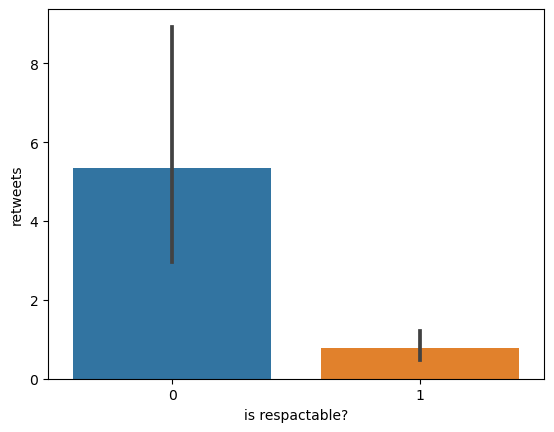

In [46]:
sns.barplot(x='is respactable?', y='retweets', data=df)
plt.show()

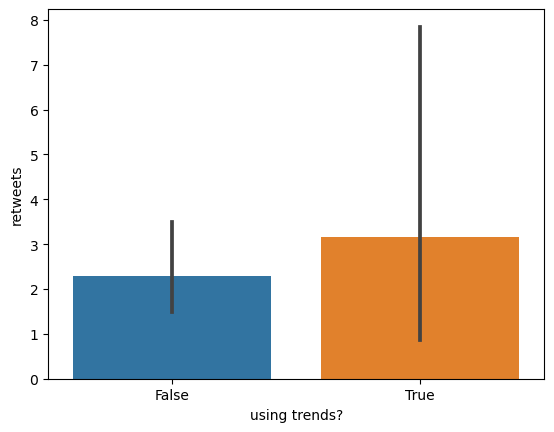

In [47]:
sns.barplot(x='using trends?', y='retweets', data=df)
plt.show()

In [48]:
df.retweets[df.retweets>0].count()

2286

In [49]:
df.retweets[df.retweets>0].count()/df.retweets.count()

0.21231540819169686

In [50]:
df.describe(include='all')

,name,city,country,acount age,total tweets,followers,following,respectability,is respactable?,verified,text,views,likes,retweets,quote retweets,comments,word count,is quote,hashtag count,trending,using trends?,link to tweet
count,10767,10767,10767,10767.000000,1.076700e+04,1.076700e+04,10767.000000,10767.000000,10767.000000,10767,10767,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767.000000,10767,10767.000000,10767,10767,10767
unique,9367,2844,5,NaN,NaN,NaN,NaN,NaN,NaN,2,10767,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,241,2,10767
top,tmj_BC_retail,Toronto,United States,NaN,NaN,NaN,NaN,NaN,NaN,False,Just posted a photo @ Estadio Juan F.Cheo Lópe...,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,"['Donny', 'Trossard', 'Jennie', 'Phineas', 'Fe...",False,https://www.twitter.com/CamuyArenas_AA/status/...
freq,3,402,3943,NaN,NaN,NaN,NaN,NaN,NaN,10414,1,NaN,NaN,NaN,NaN,NaN,NaN,7829,NaN,1142,10378,1
mean,NaN,NaN,NaN,10.636695,4.283842e+04,4.862575e+03,1478.621900,1.867945,0.662116,NaN,NaN,1093.270642,12.671682,2.323953,0.163370,1.068636,16.562924,NaN,0.640940,NaN,NaN,NaN
std,NaN,NaN,NaN,4.482510,8.703023e+05,7.723207e+04,5630.830716,7.654150,0.473011,NaN,NaN,7821.296873,140.667926,55.025730,2.946448,9.981193,12.612559,NaN,1.741994,NaN,NaN,NaN
min,NaN,NaN,NaN,0.100000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,6.900000,2.462500e+03,2.420000e+02,292.000000,0.553326,0.000000,NaN,NaN,44.000000,0.000000,0.000000,0.000000,0.000000,7.000000,NaN,0.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,11.900000,9.484000e+03,6.640000e+02,699.000000,1.086514,1.000000,NaN,NaN,130.000000,1.000000,0.000000,0.000000,0.000000,13.000000,NaN,0.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,14.300000,2.903150e+04,1.862000e+03,1578.500000,2.047466,1.000000,NaN,NaN,428.000000,4.000000,0.000000,0.000000,1.000000,23.000000,NaN,0.000000,NaN,NaN,NaN


In [51]:
df.retweets[df.retweets>1500].count()

2

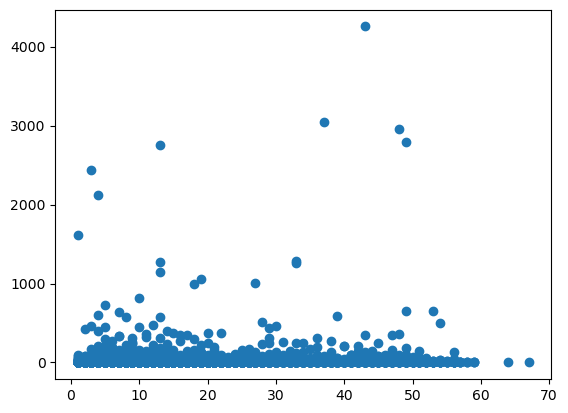

In [104]:
plt.scatter(df['word count'],df['likes'])

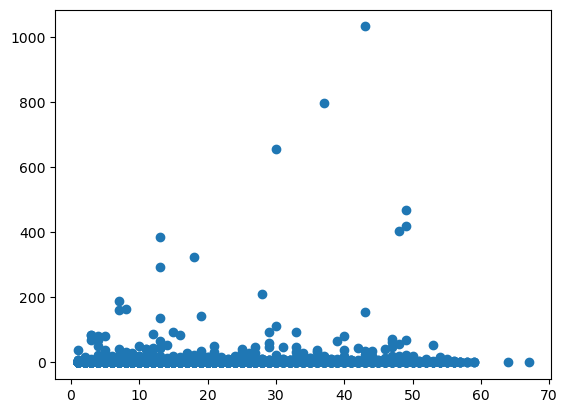

In [105]:
plt.scatter(df['word count'],df['retweets'])

(array([9.591e+03, 3.000e+00]),
 array([   0. ,  516.5, 1033. ]),
 <BarContainer object of 2 artists>)

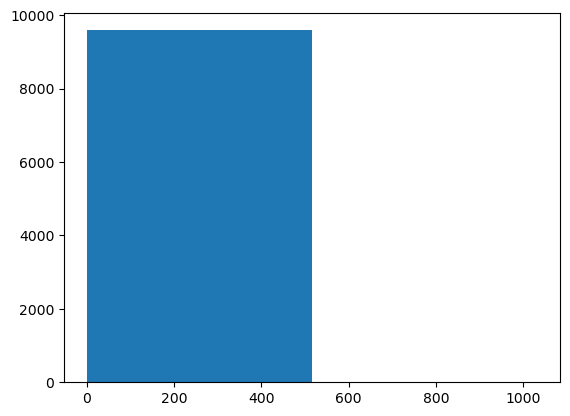

In [107]:
plt.hist(df['retweets'],bins=2)

In [108]:
df['retweets'].value_counts()

0      7556
1       995
2       318
3       184
4        93
       ... 
93        1
190       1
111       1
31        1
798       1
Name: retweets, Length: 81, dtype: int64

In [109]:
ct1=pd.crosstab(df['likes'],df['is respactable?'],normalize='index')
ct1

is respactable?,0,1
likes,,
0,0.257598,0.742402
1,0.274448,0.725552
2,0.311189,0.688811
3,0.333333,0.666667
4,0.340058,0.659942
...,...,...
2760,1.000000,0.000000
2789,1.000000,0.000000
2958,1.000000,0.000000


<AxesSubplot:xlabel='likes'>

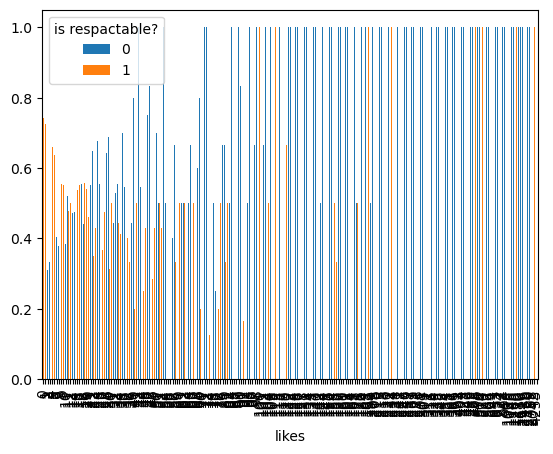

In [110]:
ct1.plot(kind='bar')

In [111]:
ct2=pd.crosstab(df['verified'],df['is respactable?'],normalize='index')
ct2

is respactable?,0,1
verified,,
False,0.313882,0.686118
True,0.869969,0.130031


<AxesSubplot:xlabel='verified'>

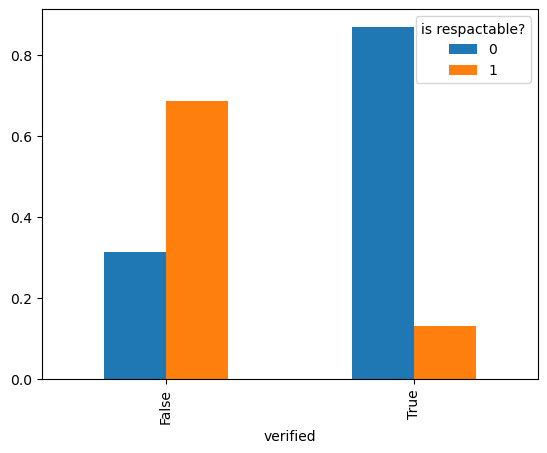

In [112]:
ct2.plot(kind='bar')

In [113]:
ct3=pd.crosstab(df['country'],df['is respactable?'],normalize='index')
ct3

is respactable?,0,1
country,,
Australia,0.317976,0.682024
Canada,0.351648,0.648352
New Zealand,0.353414,0.646586
United Kingdom,0.261635,0.738365
United States,0.377428,0.622572


<AxesSubplot:xlabel='country'>

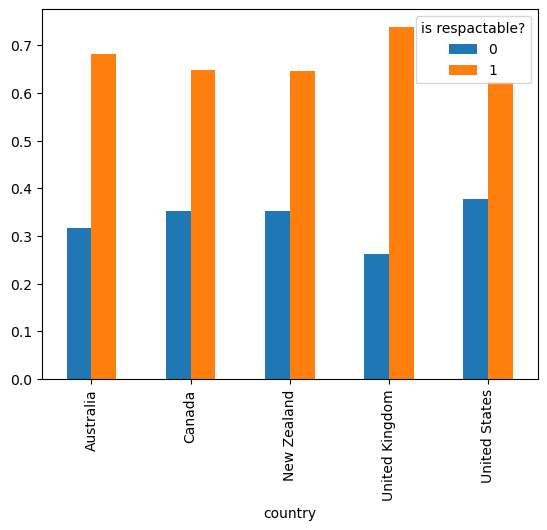

In [114]:
ct3.plot(kind='bar')

In [115]:
chi2_contingency(ct1)#לייקים ליחס עוקבים

(113.48975396323593,
 0.9999999993245264,
 217,
 array([[0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],
        [0.75724153, 0.24275847],


In [116]:
chi2_contingency(ct2)#מאומת ויחס עוקבים

(0.0,
 1.0,
 1,
 array([[0.59192552, 0.40807448],
        [0.59192552, 0.40807448]]))

In [118]:
chi2_contingency(ct3)#אין קשר בין מדינה לאם יחס העוקבים שלך טוב או לא 

(0.03629884593693801,
 0.999837278541223,
 4,
 array([[0.33242002, 0.66757998],
        [0.33242002, 0.66757998],
        [0.33242002, 0.66757998],
        [0.33242002, 0.66757998],
        [0.33242002, 0.66757998]]))

In [119]:
countryvsre=pd.crosstab(df['country'],df['retweets'])
chi2_contingency(countryvsre)


(350.7116717501949,
 0.11442255848483945,
 320,
 array([[1.04275005e+03, 1.37312904e+02, 4.38849281e+01, 2.53925370e+01,
         1.28342714e+01, 1.17302481e+01, 7.59016052e+00, 5.79612258e+00,
         6.21013133e+00, 3.31207004e+00, 1.93204086e+00, 2.76005837e+00,
         2.20804670e+00, 8.28017511e-01, 1.65603502e+00, 1.38002918e+00,
         1.10402335e+00, 4.14008755e-01, 8.28017511e-01, 1.10402335e+00,
         6.90014592e-01, 6.90014592e-01, 8.28017511e-01, 2.76005837e-01,
         1.38002918e-01, 1.38002918e-01, 4.14008755e-01, 5.52011674e-01,
         1.38002918e-01, 2.76005837e-01, 2.76005837e-01, 2.76005837e-01,
         1.38002918e-01, 5.52011674e-01, 2.76005837e-01, 2.76005837e-01,
         1.38002918e-01, 2.76005837e-01, 1.38002918e-01, 1.38002918e-01,
         4.14008755e-01, 2.76005837e-01, 1.38002918e-01, 1.38002918e-01,
         1.38002918e-01, 1.38002918e-01, 1.38002918e-01, 1.38002918e-01,
         1.38002918e-01, 1.38002918e-01, 2.76005837e-01, 1.38002918e-01,
   

In [120]:
wordcountvsre=pd.crosstab(df['word count'],df['retweets'])
chi2_contingency(wordcountvsre)

(6897.033230389284,
 5.184259066410568e-80,
 4800,
 array([[1.92168439e+02, 2.53053992e+01, 8.08755472e+00, ...,
         2.54325620e-02, 2.54325620e-02, 2.54325620e-02],
        [3.27631436e+02, 4.31436314e+01, 1.37886179e+01, ...,
         4.33604336e-02, 4.33604336e-02, 4.33604336e-02],
        [2.36272670e+02, 3.11131957e+01, 9.94371482e+00, ...,
         3.12695435e-02, 3.12695435e-02, 3.12695435e-02],
        ...,
        [2.36272670e+00, 3.11131957e-01, 9.94371482e-02, ...,
         3.12695435e-04, 3.12695435e-04, 3.12695435e-04],
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04],
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04]]))

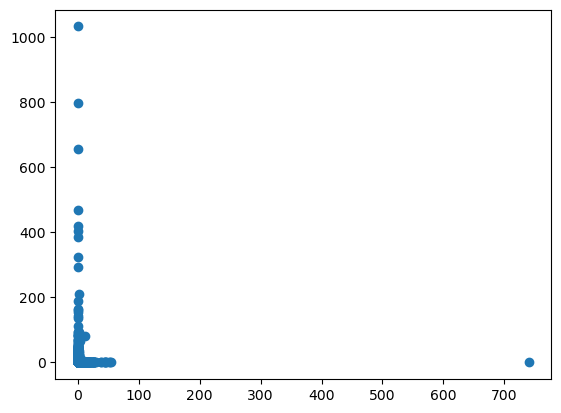

In [121]:
plt.scatter(df['respectability'],df['retweets'])

In [122]:
resvsre=pd.crosstab(df['respectability'],df['retweets'])
chi2_contingency(resvsre)

(706246.1769459252,
 1.5820734853370125e-147,
 675760,
 array([[4.80421097e+01, 6.32634980e+00, 2.02188868e+00, ...,
         6.35814050e-03, 6.35814050e-03, 6.35814050e-03],
        [1.57515114e+00, 2.07421305e-01, 6.62914321e-02, ...,
         2.08463623e-04, 2.08463623e-04, 2.08463623e-04],
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04],
        ...,
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04],
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04],
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04]]))

In [123]:
verifiedvsre=pd.crosstab(df['verified'],df['retweets'])
chi2_contingency(verifiedvsre)

(670.7990612940432,
 3.7903450023114293e-94,
 80,
 array([[7.30161309e+03, 9.61501459e+02, 3.07293934e+02, 1.77805295e+02,
         8.98689806e+01, 8.21383156e+01, 5.31483219e+01, 4.05859912e+01,
         4.34849906e+01, 2.31919950e+01, 1.35286637e+01, 1.93266625e+01,
         1.54613300e+01, 5.79799875e+00, 1.15959975e+01, 9.66333125e+00,
         7.73066500e+00, 2.89899937e+00, 5.79799875e+00, 7.73066500e+00,
         4.83166562e+00, 4.83166562e+00, 5.79799875e+00, 1.93266625e+00,
         9.66333125e-01, 9.66333125e-01, 2.89899937e+00, 3.86533250e+00,
         9.66333125e-01, 1.93266625e+00, 1.93266625e+00, 1.93266625e+00,
         9.66333125e-01, 3.86533250e+00, 1.93266625e+00, 1.93266625e+00,
         9.66333125e-01, 1.93266625e+00, 9.66333125e-01, 9.66333125e-01,
         2.89899937e+00, 1.93266625e+00, 9.66333125e-01, 9.66333125e-01,
         9.66333125e-01, 9.66333125e-01, 9.66333125e-01, 9.66333125e-01,
         9.66333125e-01, 9.66333125e-01, 1.93266625e+00, 9.66333125e-01,
 

In [124]:
comvsre=pd.crosstab(df['comments'],df['retweets'])
chi2_contingency(comvsre)

(219248.8652140414,
 0.0,
 4800,
 array([[5.62880258e+03, 7.41220033e+02, 2.36892433e+02, ...,
         7.44944757e-01, 7.44944757e-01, 7.44944757e-01],
        [1.08291641e+03, 1.42602147e+02, 4.55753596e+01, ...,
         1.43318741e-01, 1.43318741e-01, 1.43318741e-01],
        [3.38657494e+02, 4.45955806e+01, 1.42526579e+01, ...,
         4.48196790e-02, 4.48196790e-02, 4.48196790e-02],
        ...,
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04],
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04],
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04]]))

In [125]:
quovsre=pd.crosstab(df['is quote'],df['retweets'])
chi2_contingency(quovsre)

(76.0800648712129,
 0.6033992402154829,
 80,
 array([[5.50200292e+03, 7.24522618e+02, 2.31555972e+02, 1.33982072e+02,
         6.77191995e+01, 6.18938920e+01, 4.00489890e+01, 3.05828643e+01,
         3.27673546e+01, 1.74759225e+01, 1.01942881e+01, 1.45632687e+01,
         1.16506150e+01, 4.36898061e+00, 8.73796123e+00, 7.28163435e+00,
         5.82530748e+00, 2.18449031e+00, 4.36898061e+00, 5.82530748e+00,
         3.64081718e+00, 3.64081718e+00, 4.36898061e+00, 1.45632687e+00,
         7.28163435e-01, 7.28163435e-01, 2.18449031e+00, 2.91265374e+00,
         7.28163435e-01, 1.45632687e+00, 1.45632687e+00, 1.45632687e+00,
         7.28163435e-01, 2.91265374e+00, 1.45632687e+00, 1.45632687e+00,
         7.28163435e-01, 1.45632687e+00, 7.28163435e-01, 7.28163435e-01,
         2.18449031e+00, 1.45632687e+00, 7.28163435e-01, 7.28163435e-01,
         7.28163435e-01, 7.28163435e-01, 7.28163435e-01, 7.28163435e-01,
         7.28163435e-01, 7.28163435e-01, 1.45632687e+00, 7.28163435e-01,
      

In [126]:
hashvsre=pd.crosstab(df['hashtag count'],df['retweets'])
chi2_contingency(hashvsre)

(1546.5580375027916,
 0.3117211236549445,
 1520,
 array([[5.69810923e+03, 7.50346571e+02, 2.39809256e+02, ...,
         7.54117157e-01, 7.54117157e-01, 7.54117157e-01],
        [8.53731916e+02, 1.12422347e+02, 3.59299562e+01, ...,
         1.12987284e-01, 1.12987284e-01, 1.12987284e-01],
        [4.33166562e+02, 5.70408589e+01, 1.82301438e+01, ...,
         5.73274964e-02, 5.73274964e-02, 5.73274964e-02],
        ...,
        [3.15030227e+00, 4.14842610e-01, 1.32582864e-01, ...,
         4.16927246e-04, 4.16927246e-04, 4.16927246e-04],
        [1.57515114e+00, 2.07421305e-01, 6.62914321e-02, ...,
         2.08463623e-04, 2.08463623e-04, 2.08463623e-04],
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04]]))

In [127]:
trendvsre=pd.crosstab(df['using trends?'],df['retweets'])
chi2_contingency(trendvsre)

(138.29945471809282,
 5.692264278621222e-05,
 80,
 array([[7.28034855e+03, 9.58701272e+02, 3.06398999e+02, 1.77287471e+02,
         8.96072545e+01, 8.18991036e+01, 5.29935376e+01, 4.04677924e+01,
         4.33583490e+01, 2.31244528e+01, 1.34892641e+01, 1.92703773e+01,
         1.54163019e+01, 5.78111320e+00, 1.15622264e+01, 9.63518866e+00,
         7.70815093e+00, 2.89055660e+00, 5.78111320e+00, 7.70815093e+00,
         4.81759433e+00, 4.81759433e+00, 5.78111320e+00, 1.92703773e+00,
         9.63518866e-01, 9.63518866e-01, 2.89055660e+00, 3.85407546e+00,
         9.63518866e-01, 1.92703773e+00, 1.92703773e+00, 1.92703773e+00,
         9.63518866e-01, 3.85407546e+00, 1.92703773e+00, 1.92703773e+00,
         9.63518866e-01, 1.92703773e+00, 9.63518866e-01, 9.63518866e-01,
         2.89055660e+00, 1.92703773e+00, 9.63518866e-01, 9.63518866e-01,
         9.63518866e-01, 9.63518866e-01, 9.63518866e-01, 9.63518866e-01,
         9.63518866e-01, 9.63518866e-01, 1.92703773e+00, 9.63518866e-01,
 

In [128]:
ctvsre=pd.crosstab(df['city'],df['retweets'])
chi2_contingency(ctvsre)

(175004.57949660203,
 1.0,
 215200,
 array([[7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04],
        [2.36272670e+00, 3.11131957e-01, 9.94371482e-02, ...,
         3.12695435e-04, 3.12695435e-04, 3.12695435e-04],
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04],
        ...,
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04],
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04],
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04]]))

In [129]:
totalvsre=pd.crosstab(df['total tweets'],df['retweets'])
chi2_contingency(totalvsre)

(600516.4429947188,
 0.02662095729738032,
 598400,
 array([[5.51302898e+00, 7.25974567e-01, 2.32020013e-01, ...,
         7.29622681e-04, 7.29622681e-04, 7.29622681e-04],
        [7.87575568e+00, 1.03710652e+00, 3.31457161e-01, ...,
         1.04231812e-03, 1.04231812e-03, 1.04231812e-03],
        [1.57515114e+00, 2.07421305e-01, 6.62914321e-02, ...,
         2.08463623e-04, 2.08463623e-04, 2.08463623e-04],
        ...,
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04],
        [1.57515114e+00, 2.07421305e-01, 6.62914321e-02, ...,
         2.08463623e-04, 2.08463623e-04, 2.08463623e-04],
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04]]))

In [130]:
viewsvsre=pd.crosstab(df['views'],df['retweets'])
chi2_contingency(viewsvsre)

(707722.099061461,
 0.0,
 159840,
 array([[3.30781739e+01, 4.35584740e+00, 1.39212008e+00, ...,
         4.37773609e-03, 4.37773609e-03, 4.37773609e-03],
        [5.04048364e+01, 6.63748176e+00, 2.12132583e+00, ...,
         6.67083594e-03, 6.67083594e-03, 6.67083594e-03],
        [5.27675631e+01, 6.94861372e+00, 2.22076298e+00, ...,
         6.98353137e-03, 6.98353137e-03, 6.98353137e-03],
        ...,
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04],
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04],
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04]]))

In [131]:
likesvsre=pd.crosstab(df['retweets'],df['likes'])
chi2_contingency(likesvsre)


(522097.0538389021,
 0.0,
 17360,
 array([[3.16132833e+03, 1.24830728e+03, 6.75739837e+02, ...,
         7.87575568e-01, 7.87575568e-01, 7.87575568e-01],
        [4.16294559e+02, 1.64381384e+02, 8.89837398e+01, ...,
         1.03710652e-01, 1.03710652e-01, 1.03710652e-01],
        [1.33046904e+02, 5.25359600e+01, 2.84390244e+01, ...,
         3.31457161e-02, 3.31457161e-02, 3.31457161e-02],
        ...,
        [4.18386492e-01, 1.65207421e-01, 8.94308943e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04],
        [4.18386492e-01, 1.65207421e-01, 8.94308943e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04],
        [4.18386492e-01, 1.65207421e-01, 8.94308943e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04]]))

In [132]:
quotretevsre=pd.crosstab(df['quote retweets'],df['retweets'])
chi2_contingency(quotretevsre)

(149173.91515676267,
 0.0,
 1760,
 array([[7.12440859e+03, 9.38166562e+02, 2.99836148e+02, ...,
         9.42880967e-01, 9.42880967e-01, 9.42880967e-01],
        [3.13455076e+02, 4.12768397e+01, 1.31919950e+01, ...,
         4.14842610e-02, 4.14842610e-02, 4.14842610e-02],
        [5.11924119e+01, 6.74119241e+00, 2.15447154e+00, ...,
         6.77506775e-03, 6.77506775e-03, 6.77506775e-03],
        ...,
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04],
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04],
        [7.87575568e-01, 1.03710652e-01, 3.31457161e-02, ...,
         1.04231812e-04, 1.04231812e-04, 1.04231812e-04]]))

In [ ]:
df=df.drop(["link to tweet"], axis=1)

In [83]:
column_to_move = df.pop("retweets")

In [ ]:
df.insert(df.shape[1], "retweets", column_to_move)

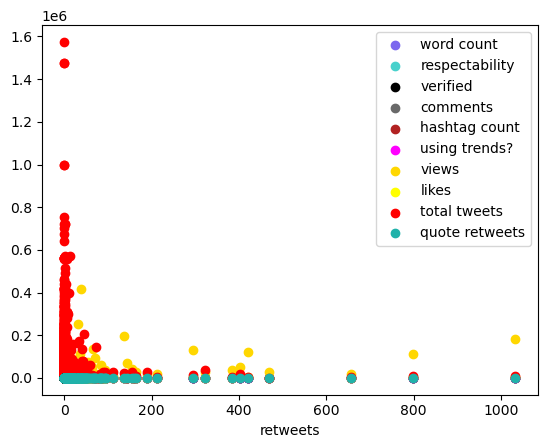

In [135]:
plt.scatter(y = df['word count'],    x = df['retweets'],c = 'mediumslateblue',label = 'word count');
plt.scatter(y = df['respectability'],x = df['retweets'],c = 'mediumturquoise',label = 'respectability');
plt.scatter(y = df['verified'],      x = df['retweets'],c = 'black',label = 'verified');
plt.scatter(y = df['comments'],      x = df['retweets'],c = 'dimgray',label = 'comments');
plt.scatter(y = df['hashtag count'], x = df['retweets'],c = 'firebrick',label = 'hashtag count');
plt.scatter(y = df['using trends?'], x = df['retweets'],c = 'fuchsia',label = 'using trends?');
plt.scatter(y = df['views'],         x = df['retweets'],c = 'gold',label = 'views');
plt.scatter(y = df['likes'],         x = df['retweets'],c = 'yellow',label = 'likes');
plt.scatter(y = df['total tweets'],  x = df['retweets'],c = 'red',label = 'total tweets');
plt.scatter(y = df['quote retweets'],x = df['retweets'],c = 'lightseagreen',label = 'quote retweets');

plt.legend(numpoints = 10, loc = 0)
plt.xlabel('retweets')

plt.show()

In [136]:
pd.DataFrame({'total tweets':df['total tweets'], 'ret':df['retweets']}).value_counts()

total tweets  ret
15            0      10
19            0       8
2             0       8
16            0       6
467           0       6
                     ..
6479          4       1
6475          0       1
6472          0       1
6462          0       1
1574466       0       1
Length: 8127, dtype: int64

In [138]:
df.describe()

,acount age,total tweets,followers,following,respectability,is respactable?,views,likes,quote retweets,comments,word count,hashtag count,retweets
count,9594.000000,9.594000e+03,9.594000e+03,9594.000000,9594.000000,9594.000000,9594.000000,9594.000000,9594.00000,9594.000000,9594.000000,9594.000000,9594.000000
mean,10.609381,2.628971e+04,4.805804e+03,1464.772358,1.878679,0.667396,1072.711278,11.219408,0.13227,1.016573,16.670315,0.645820,1.565353
std,4.481777,5.892967e+04,8.111512e+04,5908.293493,8.001600,0.471170,7654.539461,94.066601,1.42344,9.565067,12.702648,1.742177,18.940495
min,0.100000,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000
25%,6.900000,2.331250e+03,2.370000e+02,287.250000,0.563243,0.000000,44.000000,0.000000,0.00000,0.000000,7.000000,0.000000,0.000000
50%,11.900000,8.984000e+03,6.470000e+02,686.000000,1.092433,1.000000,130.000000,1.000000,0.00000,0.000000,13.000000,0.000000,0.000000
75%,14.300000,2.733050e+04,1.764000e+03,1537.000000,2.071834,1.000000,434.750000,4.000000,0.00000,1.000000,24.000000,0.000000,0.000000
max,19.200000,1.574466e+06,6.752268e+06,435333.000000,740.000000,1.000000,414784.000000,4255.000000,96.00000,538.000000,67.000000,22.000000,1033.000000
